In [16]:
import numpy as np
import sys
sys.path.append('./ckplotlib/')
import map_funcs
from IPython.display import Image
#
import Nio

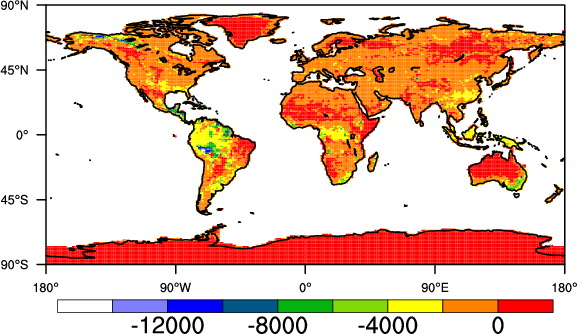

In [21]:
## set paths
exp_paths = '/gpfs/fs1/p/cgd/ccr/CESM2_2X-4XCO2_runs/lnd/'

fin_4x_y200_totsomc = Nio.open_file(exp_paths+'b.e20.B1850.f09_g17.4xCO2_to_PI_yr200.001.clm2.h0.TOTSOMC.020001-030412.nc')
#fin_4x_y200_totsomc.variables['TOTSOMC'].shape
diff = fin_4x_y200_totsomc.variables['TOTSOMC'][1259,:,:] - fin_4x_y200_totsomc.variables['TOTSOMC'][0,:,:]
lats = fin_4x_y200_totsomc.variables['lat'][:]
lons = fin_4x_y200_totsomc.variables['lon'][:]
diff.shape
map_funcs.fill(diff, lats, lons, file='changesom', makepng=True,png_dens=100)
Image('changesom.png')

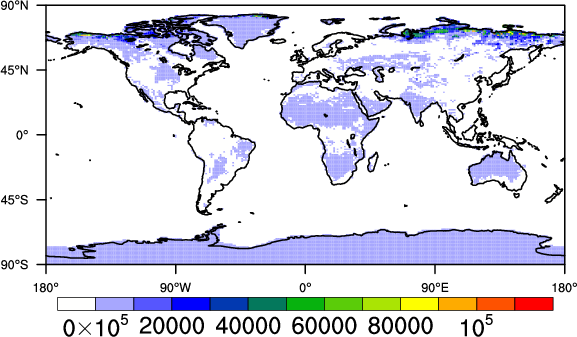

In [29]:
fin_4x_y25_totsomc = Nio.open_file(exp_paths+'b.e20.B1850.f09_g17.4xCO2_to_PI_yr25.001.clm2.h0.TOTSOMC.002501-012412.nc')
fin_4x_y25_totsomc.variables['TOTSOMC'][:].shape
diff2 = fin_4x_y25_totsomc.variables['TOTSOMC'][0,:,:] - fin_4x_y200_totsomc.variables['TOTSOMC'][0,:,:]
map_funcs.fill(diff2, lats, lons, file='changesom2', makepng=True,png_dens='100')
Image('changesom2.png')

